In [ ]:
from google.colab import files
upload = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2 ,f_classif
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC

In [ ]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
# Display the first five rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Check for missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Show basic statistics for numerical features
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.nunique().sort_values()

,0
EmployeeCount,1
Over18,1
StandardHours,1
Attrition,2
OverTime,2
PerformanceRating,2
Gender,2
BusinessTravel,3
Department,3
MaritalStatus,3


In [ ]:
cat_features=df.select_dtypes(include=object).columns
df[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


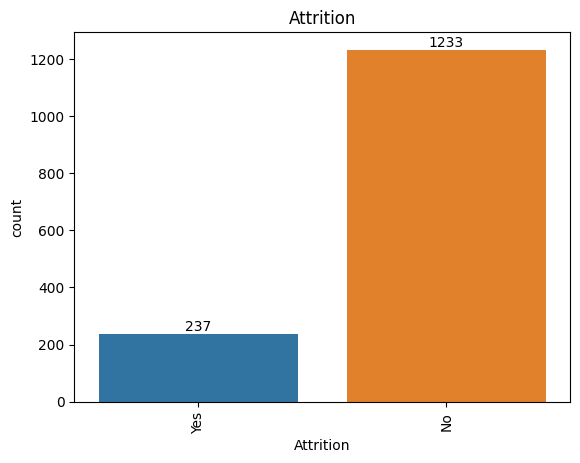

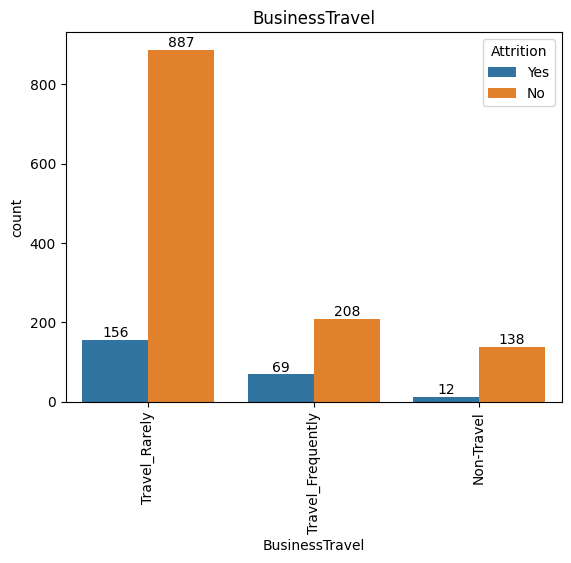

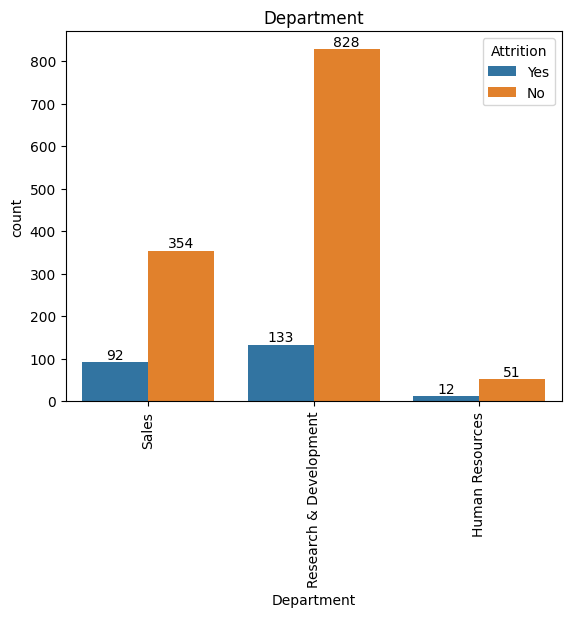

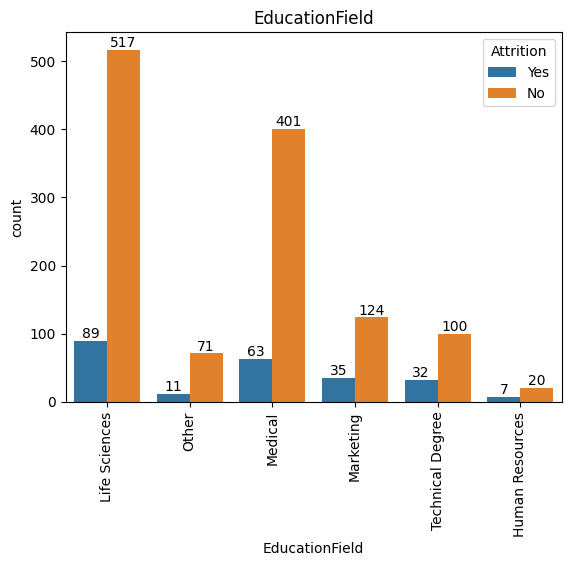

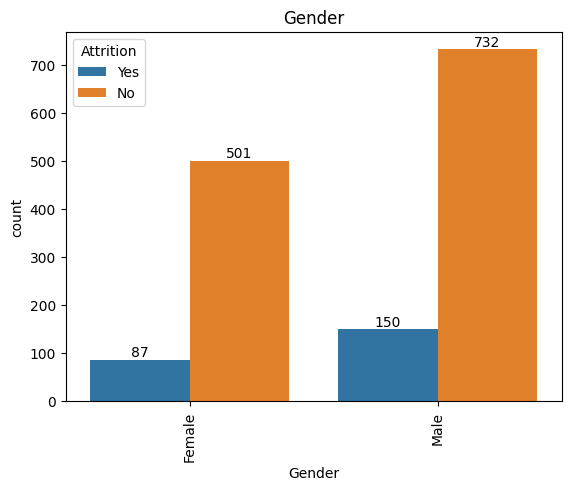

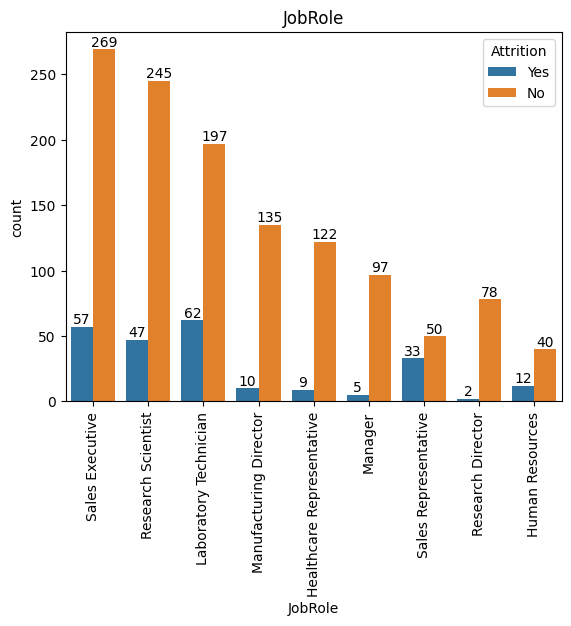

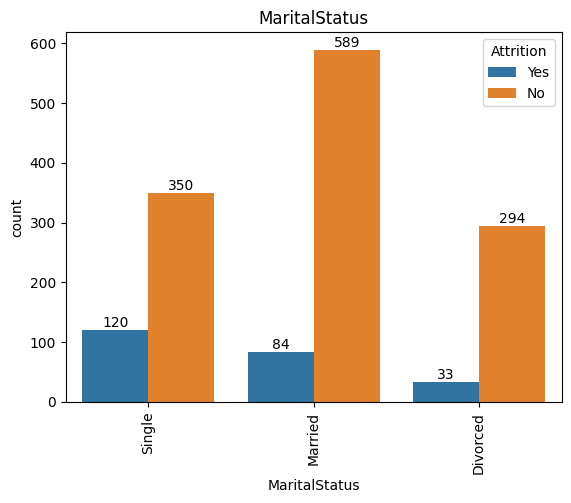

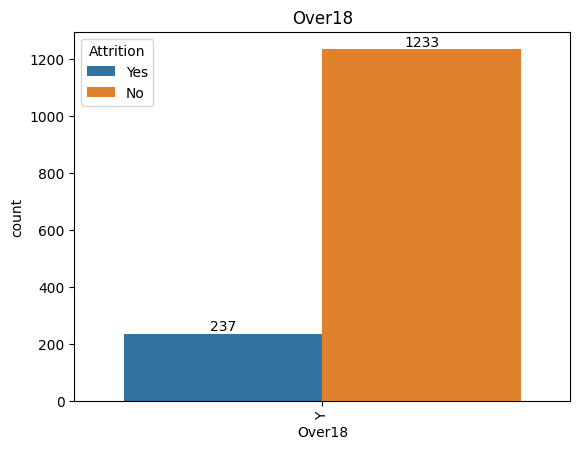

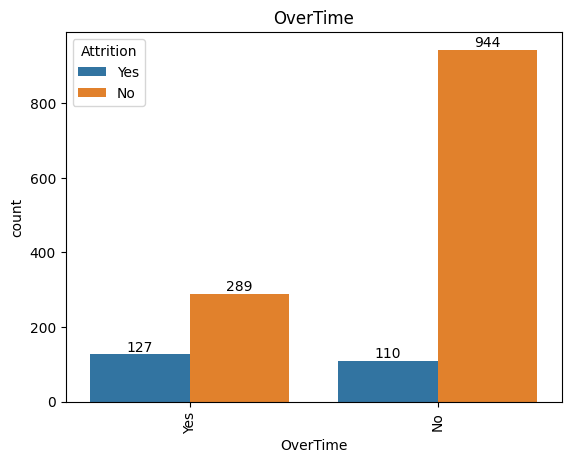

In [ ]:
for i in df[cat_features]:
    plt.figure()
    ax=sns.countplot(df,x=i,hue='Attrition')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

The attrition rate is approximately 16.12%.

Frequent business travel is a significant factor contributing to higher attrition rates.

Among departments, the Sales department has the highest attrition rate, whereas Research & Development exhibits the lowest.

Male employees leave the company at a rate approximately 3% higher than female employees.

Employees who work beyond the standard workweek are more likely to leave the company compared to those working regular hours.

The attrition rate among single employees is significantly higher than that of married or divorced employees.

Directors and Managers have the lowest attrition rates within the company.

The Sales Representative role experiences the highest attrition rate among all job positions.

Among education fields, Human Resources has the highest attrition rate, while Medical has the lowest.

In [ ]:
num_features=df.select_dtypes(exclude=object).columns
df[num_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [ ]:
print('Number of unique values for each numerical feature')
for i in num_features:
    print(f'{i}: {df[i].nunique()}')

Number of unique values for each numerical feature
Age: 43
DailyRate: 886
DistanceFromHome: 29
Education: 5
EmployeeCount: 1
EmployeeNumber: 1470
EnvironmentSatisfaction: 4
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobSatisfaction: 4
MonthlyIncome: 1349
MonthlyRate: 1427
NumCompaniesWorked: 10
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


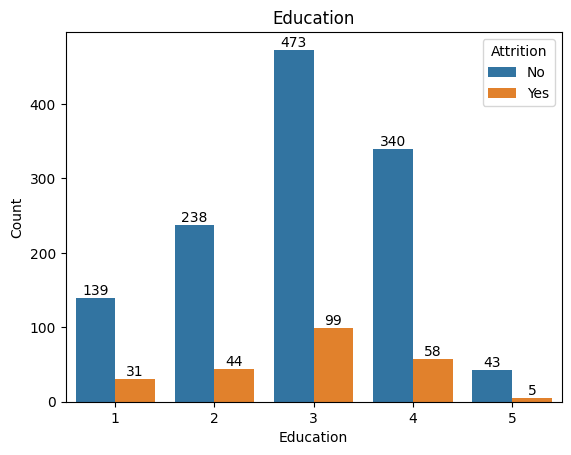

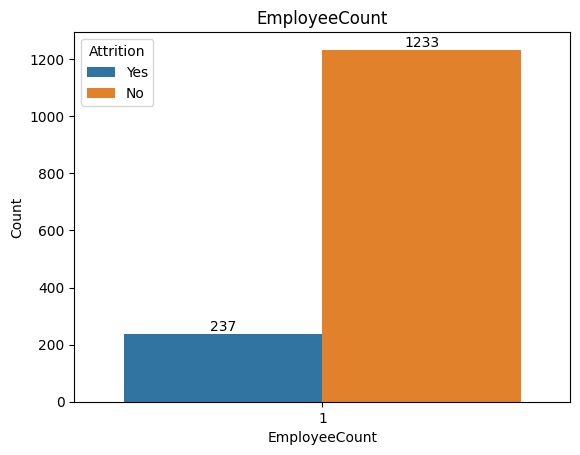

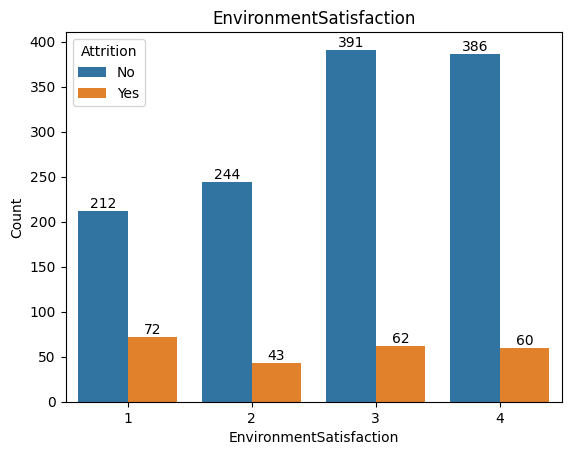

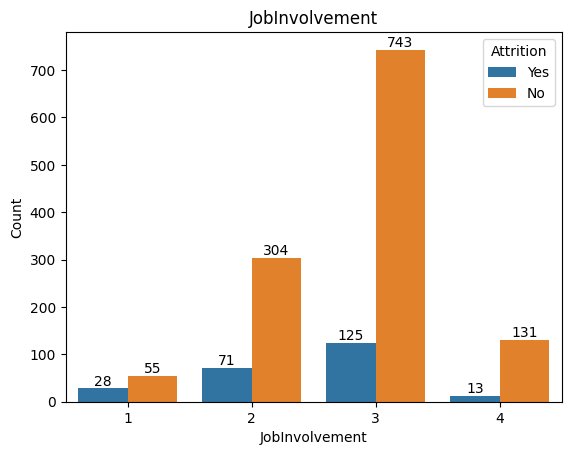

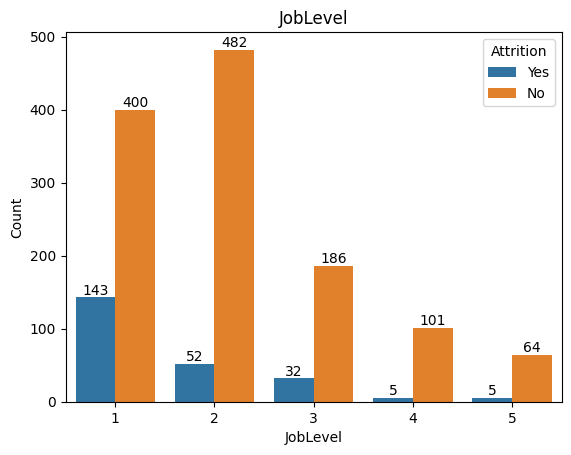

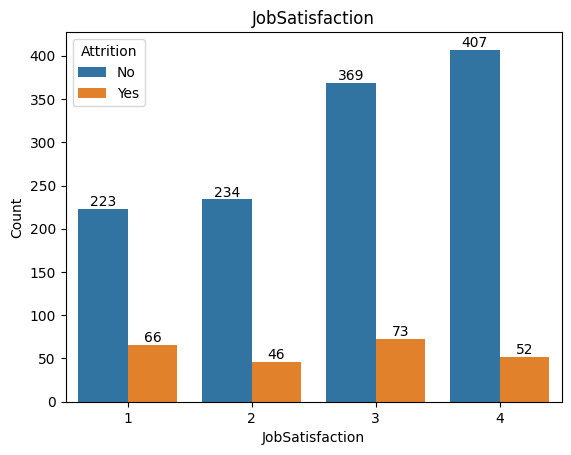

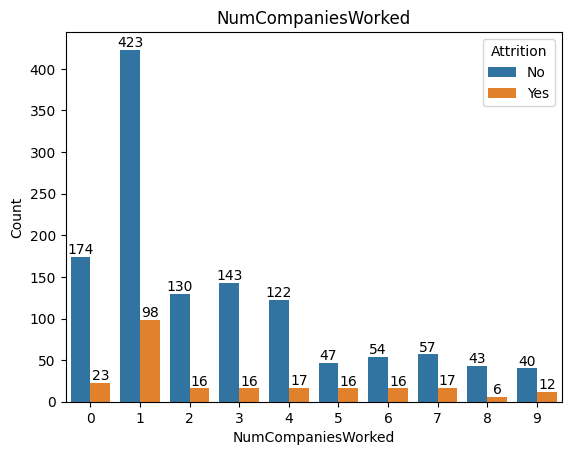

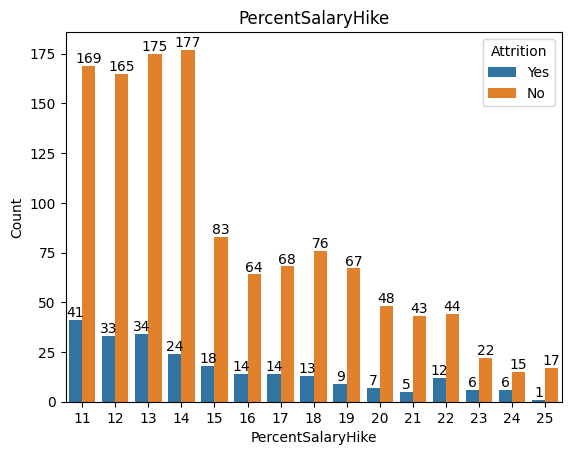

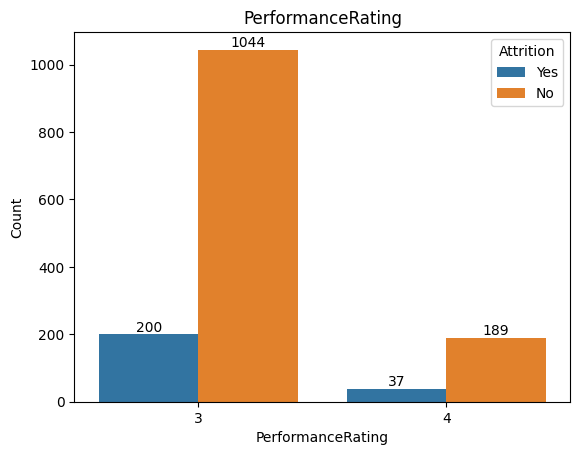

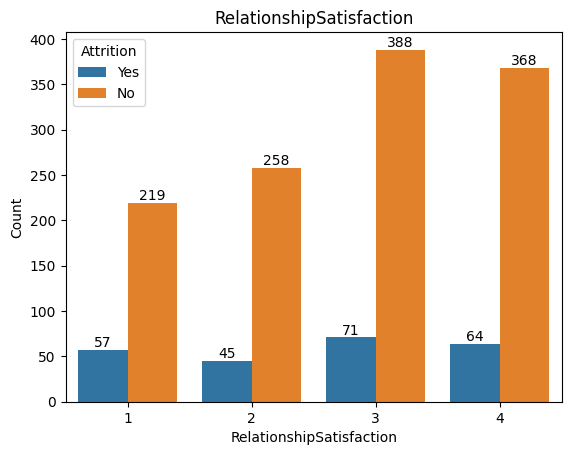

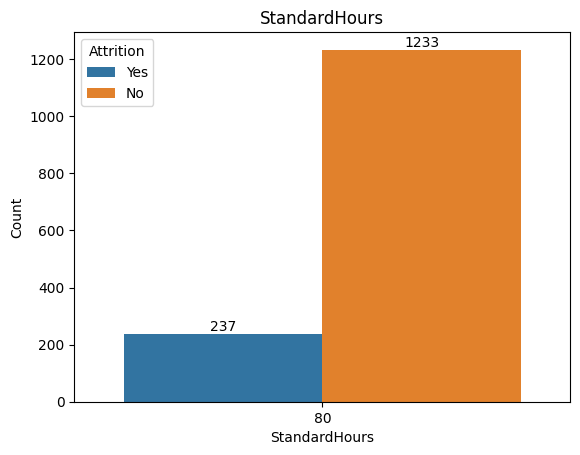

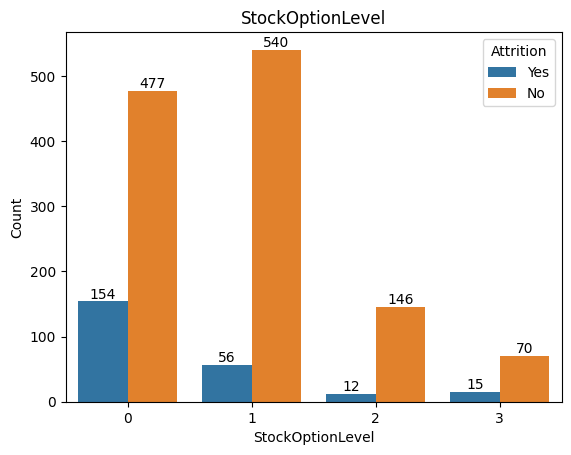

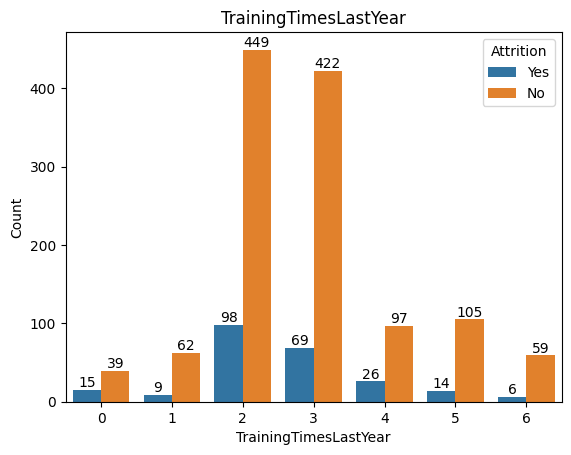

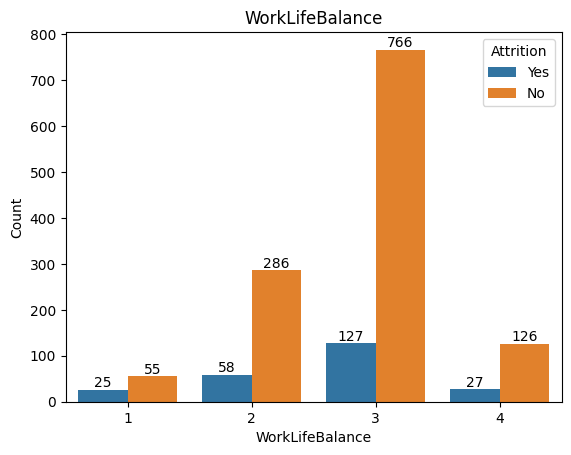

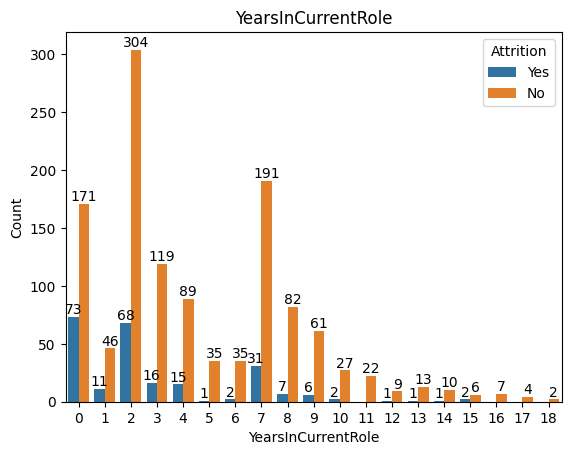

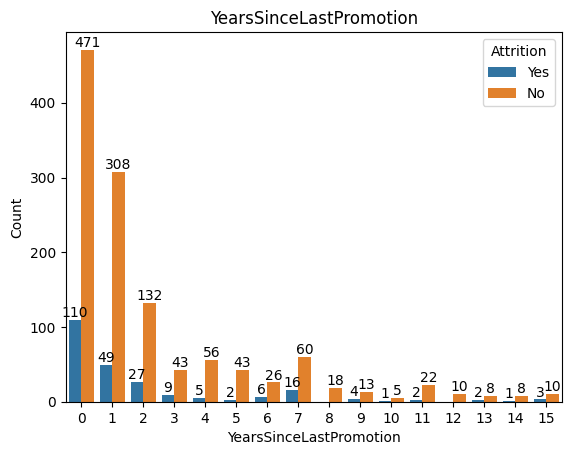

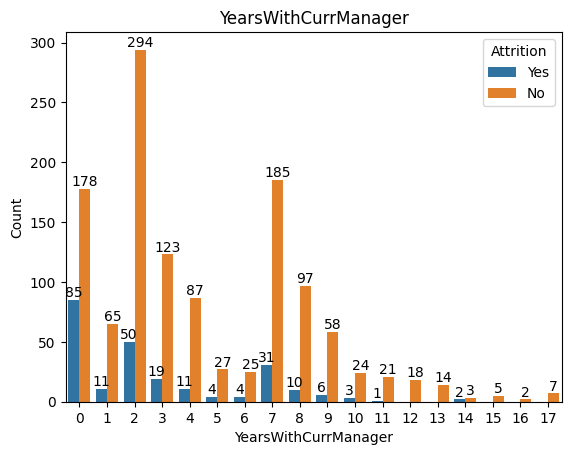

In [ ]:
#First let's analyse features wich are discrete and have the least number of unique values
for i in num_features:
    if (df[i].nunique()<=20):
        plt.figure()
        ax=sns.countplot(data=df,x=i,hue='Attrition')
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(i)
        plt.ylabel('Count')
        plt.xlabel(i)
        plt.show()

Attrition for employees who have worked with their current manager for less than a year is the highest, whereas those who have been with their current manager for over 10 years have a significantly lower attrition rate.

Employees with less than a year since their last promotion are more likely to leave the company.

Employees who have spent less than a year in their current role are more likely to leave the company.

Employees with a work-life balance index of 1 are highly prone to leaving the company.

Employees with 0 or 4 training sessions last year have the highest attrition ratio among all groups, whereas employees with 6 training sessions last year have the lowest attrition ratio.

Employees with a stock option level of 0 or 3 have the highest attrition ratio, while those with levels 1 and 2 have the lowest.

Since the standard working hours are the same for all employees, this metric does not provide meaningful insights.

Higher relationship satisfaction is associated with lower attrition rates overall.

Increasing the percent salary hike can help reduce the attrition rate.

Employees who have worked for 2 to 5 companies before IBM and those for whom this is their first job have the lowest attrition ratio. However, employees who have worked for more than 5 companies or whose current company is only their second job are more likely to leave.

In general, as job level or job satisfaction increases, the attrition ratio decreases, though there may be exceptions.

Employees with lower job involvement are more likely to leave the company. Notably, the attrition ratio for employees with a job involvement score of 1 is approximately 34%.

As environment satisfaction increases, the attrition ratio decreases.

The lowest attrition ratio is observed for employees with education level 5.

The employeeCount column indicates that the data is computed for each employee separately, so it is not necessary for our analysis.